In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from utils import plot, draw_boundary, LeastSquare, Logistic
plt.rcParams['figure.figsize'] = (11, 8)

* ## Claim for linear classifier

## XOR problem

---
(XOR_table.png)
(XOR_Gate)

- Logistic Regression모델로 XOR게이트 구현하기

In [3]:
# XOR inputs & Corresponding outputs
X_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T
Y_train = np.array([0, 1, 1, 0])

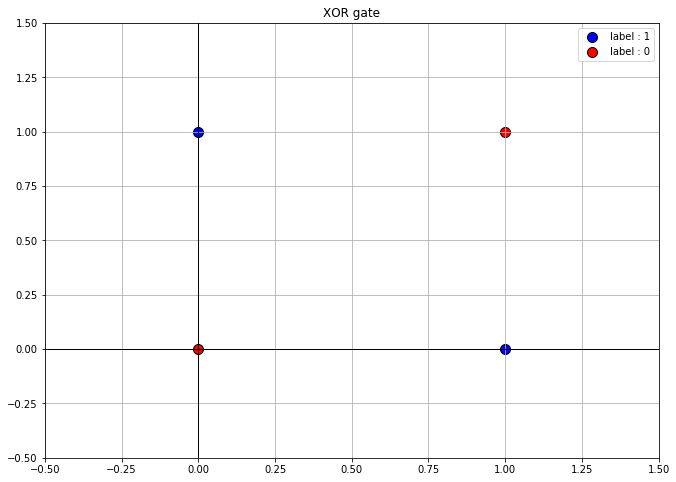

In [4]:
# Visualizing XOR gate
xlim = (-.5, 1.5)
ylim = (-.5, 1.5)
plot(X_train, Y_train, title='XOR gate', s=100, axis=True, xlim=xlim, ylim=ylim)

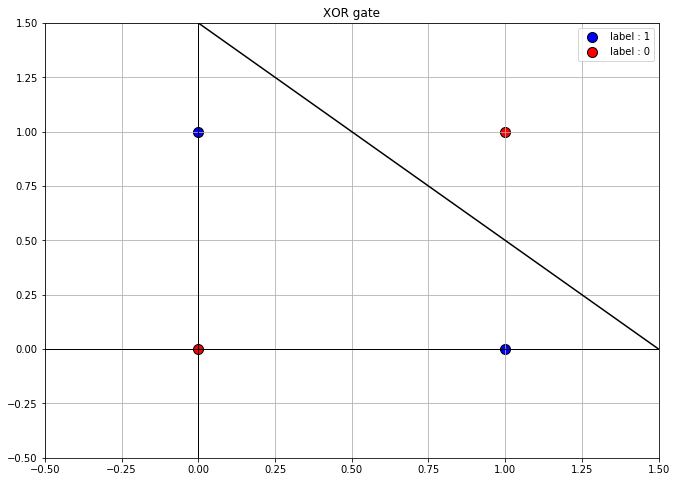

In [5]:
model = LeastSquare(X_train, Y_train)
model.fit()
draw_boundary(X_train, Y_train, model, title='XOR gate', s=100, axis=True, xlim=xlim, ylim=ylim)

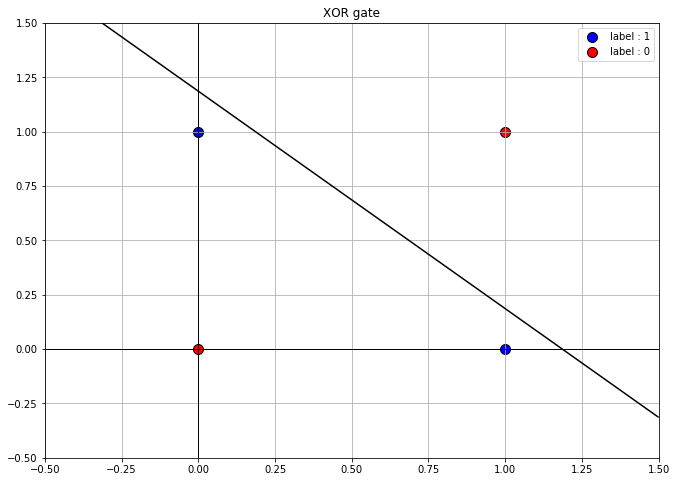

In [7]:
model = Logistic(X_train, Y_train, seed=2019)
model.fit(iteration=1000, lr=0.5)
draw_boundary(X_train, Y_train, model, title='XOR gate', s=100, axis=True, xlim=xlim, ylim=ylim)

In [9]:
model.w, model.b

(array([[-8.56240710e-10],
        [-8.56222468e-10]]), array([[1.01561107e-09]]))

 ### -> linear classifier가 잘 동작하려면 데이터가 linearly seperable 해야하기 때문!
---
## 2 layer DNN (1 hidden layer DNN)

In [14]:
class DNN_2L:
    def __init__(self, data, labels, hdim, seed):
        np.random.seed(seed)
        self.hdim = hdim
        self.W1 = np.random.randn(hdim, len(data))
        self.b1 = np.random.randn(hdim, 1)
        self.W2 = np.random.randn(1, hdim)
        self.b2 = np.random.randn(1, 1)
#         self.W1 = np.zeros((hdim, len(data)))
#         self.b1 = np.zeros((hdim, 1))
#         self.W2 = np.zeros((1, hdim))
#         self.b2 = np.zeros((1, 1))
        self.data = data
        self.labels = labels
        self.model_name = 'DNN_2L'
        
    def _forward(self, data=None):
        if data is None:
            data = self.data
        self.Z1 = self.W1.dot(data) + self.b1
        self.A1 = self.relu(self.Z1)
        self.Z2 = self.W2.dot(self.A1) + self.b2
        self.yhat = self.sigmoid(self.Z2)
        return self.yhat
    
    def _backward(self):
        data = self.data
        labels = self.labels
        dZ2 = (self.yhat - labels) / len(labels)
        self.dW2 = dZ2.dot(self.A1.T)
        self.db2 = np.sum(dZ2, axis=1, keepdims=True)
        dA1 = self.W2.T.dot(dZ2)
        dA1[self.Z1 < 0 ] = 0
        dZ1 = dA1
        self.dW1 = dZ1.dot(data.T)
        self.db1 = np.sum(dZ1, axis=1, keepdims=True)
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def relu(self, z):
        return np.maximum(0, z)
    
    def fit(self, iteration, lr, verbose=False):
        for i in range(iteration):
            self._forward()
            self._backward()
            self.W1 -= lr * self.dW1
            self.b1 -= lr * self.db1
            self.W2 -= lr * self.dW2
            self.b2 -= lr * self.db2
            if verbose:
                train_acc = self.get_accuracy(self.data, self.labels)
                print('[{}/{}] iterations , Train accuracy: {:.4f}'.format(i+1, iteration, train_acc), end='\r')
        
    def predict(self, data):
        return self._forward(data)
    
    def get_accuracy(self, data, labels):
        yhat = self.predict(data)
        decision_0 = yhat < 0.5
        decision_1 = yhat >= 0.5
        yhat[decision_0] = 0
        yhat[decision_1] = 1
        n_correct = (yhat == labels).sum()
        acc = n_correct / len(labels) * 100
        return acc

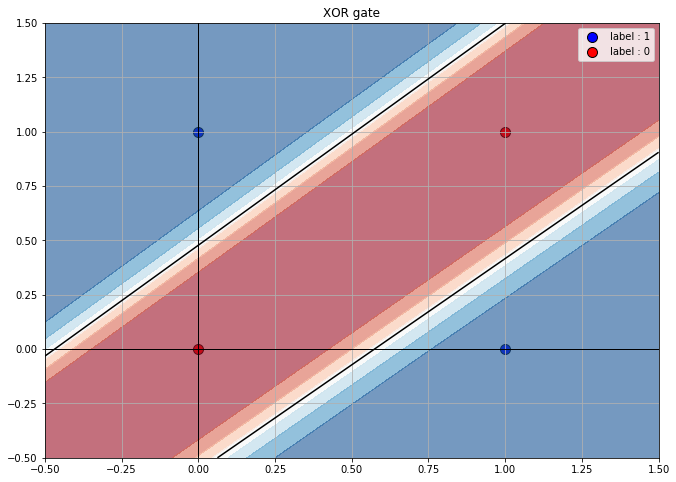

In [15]:
model = DNN_2L(X_train, Y_train, hdim=2, seed=2019)
model.fit(iteration=10000, lr=0.1)
draw_boundary(X_train, Y_train, model, title='XOR gate', xlim=xlim, ylim=ylim, s=100, axis=True, colormap=True)

# Other Non-Linear Synthetic Data

 - Circle Dataset
 - Moon shaped Dataset

### Non-Linear Dataset 생성

In [ ]:
from sklearn.datasets import make_moons, make_circles
from planar_utils import load_planar_dataset

def generate_data(n_samples, set_type='Moon', p=0.8, seed=2019):
    assert(set_type in ['Moon', 'Circle', 'Planar']), 'You must choice set type one of "Moon" or "Circle" or "Planar" !'
    np.random.seed(seed)
    n_train = int(n_samples * p)
    n_test = n_samples - n_train
    if set_type == 'Moon':
        X_train, Y_train = make_moons(n_samples=n_train, noise=0.2, random_state=2019)
        X_test, Y_test = make_moons(n_samples=n_test, noise=0.3, random_state=2019)
    elif set_type == 'Circle':
        X_train, Y_train = make_circles(n_samples=n_train, noise=0.15, random_state=2019, factor=0.4)
        X_test, Y_test = make_circles(n_samples=n_test, noise=0.25, random_state=2019, factor=0.4)
    else:
        X_train, Y_train = load_planar_dataset(n_samples=n_train, noise=0.2)
        X_test, Y_test = load_planar_dataset(n_samples=n_test, noise=0.4)
    return (X_train.T, Y_train), (X_test.T, Y_test)

### Non-Linear Dataset 시각화

 #### Moon shaped Dataset

In [ ]:
(X_train, Y_train), (X_test, Y_test) = generate_data(2000, 'Moon')
plot(X_train, Y_train)

 #### Circle shaped Dataset

In [ ]:
(X_train, Y_train), (X_test, Y_test) = generate_data(2000, 'Circle')
plot(X_train, Y_train)

In [ ]:
(X_train, Y_train), (X_test, Y_test) = generate_data(2000, 'Planar')
plot(X_train, Y_train)

## 3 Layer DNN (2 hidden layer DNN)

In [ ]:
class DNN_3L:
    def __init__(self, data, labels, hdim, seed):
        np.random.seed(seed)
        self.hdim = hdim
        self.W1 = np.random.randn(hdim, len(data))
        self.b1 = np.random.randn(hdim, 1)
        self.W2 = np.random.randn(hdim, hdim)
        self.b2 = np.random.randn(hdim, 1)
        self.W3 = np.random.randn(1, hdim)
        self.b3 = np.random.randn(1, 1)
        self.data = data
        self.labels = labels
        self.model_name = 'DNN_3L'
        
    def _forward(self, data=None):
        if data is None:
            data = self.data
        self.Z1 = self.W1.dot(data) + self.b1
        self.A1 = self.relu(self.Z1)
        self.Z2 = self.W2.dot(self.A1) + self.b2
        self.A2 = self.relu(self.Z2)
        self.Z3 = self.W3.dot(self.A2) + self.b3
        self.yhat = self.sigmoid(self.Z3)
        return self.yhat
    
    def _backward(self):
        data = self.data
        labels = self.labels
        dZ3 = (self.yhat - labels) / len(labels)
        self.dW3 = dZ3.dot(self.A2.T)
        self.db3 = np.sum(dZ3, axis=1, keepdims=True)
        dA2 = self.W3.T.dot(dZ3)
        dA2[self.Z2 < 0 ] = 0
        dZ2 = dA2
        self.dW2 = dZ2.dot(self.A1.T)
        self.db2 = np.sum(dZ2, axis=1, keepdims=True)
        dA1 = self.W2.T.dot(dZ2)
        dA1[self.Z1 < 0 ] = 0
        dZ1 = dA1
        self.dW1 = dZ1.dot(data.T)
        self.db1 = np.sum(dZ1, axis=1, keepdims=True)
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def relu(self, z):
        return np.maximum(0, z)
    
    def fit(self, iteration, lr, verbose=False):
        for i in range(iteration):
            self._forward()
            self._backward()
            self.W1 -= lr * self.dW1
            self.b1 -= lr * self.db1
            self.W2 -= lr * self.dW2
            self.b2 -= lr * self.db2
            self.W3 -= lr * self.dW3
            self.b3 -= lr * self.db3
            if verbose:
                    n_bars = iteration // 20
                    if (i + 1) % n_bars == 0 or i + 1 == iteration:
                        train_acc = self.get_accuracy(self.data, self.labels)
                        print('[' + '=' * int((i/iteration) * 20) + '>' + '-' *  int((1 - i/iteration) * 20) + ']    '\
                              + '[{}/{}] iterations , Train accuracy: {:.2f}%'.format(i+1, iteration, train_acc), end='\r')
                    if i + 1 == iteration:
                        print('\n Done!')
        
    def predict(self, data):
        return self._forward(data)
    
    def get_accuracy(self, data, labels):
        yhat = self.predict(data)
        decision_0 = yhat < 0.5
        decision_1 = yhat >= 0.5
        yhat[decision_0] = 0
        yhat[decision_1] = 1
        n_correct = (yhat == labels).sum()
        acc = n_correct / len(labels) * 100
        return acc

### Moon Dataset 학습 및 성능 측정

In [ ]:
(X_train, Y_train), (X_test, Y_test) = generate_data(2000, 'Moon')
model = DNN_3L(X_train, Y_train, hdim=20, seed=2019)
model.fit(iteration=10000, lr=0.01, verbose=True)
print('Test accuracy : {:.2f}%'.format(model.get_accuracy(X_test, Y_test)))

In [ ]:
draw_boundary(X_test, Y_test, model, title='Test data', colormap=True)

### Circle Dataset 학습 및 성능 측정

In [ ]:
(X_train, Y_train), (X_test, Y_test) = generate_data(2000, 'Circle')
model = DNN_3L(X_train, Y_train, hdim=20, seed=2019)
model.fit(iteration=10000, lr=0.01, verbose=True)
print('Test accuracy : {:.2f}%'.format(model.get_accuracy(X_test, Y_test)))

In [ ]:
draw_boundary(X_test, Y_test, model, title='Test data', colormap=False)

# Real Dataset
 - Ants & Bees Dataset
 - Cats & Dogs Dataset

In [ ]:
# 데이터 로드를 위한 클래스 정의
from PIL import Image
import os

class Image_folder:
    def __init__(self, path, imgsize):
        self.train_path = os.path.join(path, 'train')
        self.test_path = os.path.join(path, 'test')
        self.imgsize = imgsize
        
    def _find_classes(self, path):
        classes = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]
        classes.sort()
        class_to_label = {classes[i]: i for i in range(len(classes))}
        return classes, class_to_label

    def make_dataset(self, dir, class_to_label, extensions=('.jpg', '.jpeg', '.png', '.ppm', '.bmp', '.pgm', '.tif', '.tiff', '.webp'), is_valid_file=None):
        images = []
        dir = os.path.expanduser(dir)
        if not ((extensions is None) ^ (is_valid_file is None)):
            raise ValueError("Both extensions and is_valid_file cannot be None or not None at the same time")
        if extensions is not None:
            def is_valid_file(x):
                return self.has_file_allowed_extension(x, extensions)
        for target in sorted(class_to_label.keys()):
            d = os.path.join(dir, target)
            if not os.path.isdir(d):
                continue
            for root, _, fnames in sorted(os.walk(d)):
                for fname in sorted(fnames):
                    path = os.path.join(root, fname)
                    if is_valid_file(path):
                        item = (path, class_to_label[target])
                        images.append(item)
        return images

    def has_file_allowed_extension(self, filename, extensions):
        return filename.lower().endswith(extensions)
    
    def get_data(self, train=True):
        if train:
            path = self.train_path
        else:
            path = self.test_path
        img_size = self.imgsize
        data = None
        labels = []
        samples = []
        classes, class_to_label = self._find_classes(path)
        for path, label in self.make_dataset(path, class_to_label):
            labels.append(label)
            with open(path, 'rb') as f:
                img = Image.open(f)
                samples.append(img.convert('RGB').resize((256, 256)))  # 이미지 플로팅용 데이터
                if data is None:
                    data = np.array(img.convert('RGB').resize((img_size, img_size))).reshape(-1, 1)
                else:
                    data = np.concatenate((data, np.array(img.convert('RGB').resize((img_size, img_size))).reshape(-1, 1)), axis=1)
        labels = np.array(labels)
        return data, labels, samples

In [ ]:
path = 'data/hymenoptera_data'
folder = Image_folder(path, imgsize=32)
X_train, Y_train, train_samples = folder.get_data()
X_test, Y_test, test_samples = folder.get_data(train=False)

# 데이터셋 기본 정보
print('Number of train data: {}'.format(len(Y_train)))
print('Number of test data: {}'.format(len(Y_test)))
print('Number of feature(Dimensions) : {}'.format(len(X_train)))

# 데이터 이미지 플로팅
plt.subplot(1, 2, 1)
plt.imshow(train_samples[1])
plt.title('Ants')
plt.xticks([]); plt.yticks([])
plt.subplot(1, 2, 2)
plt.imshow(train_samples[200])
plt.title('Bee')
plt.xticks([]); plt.yticks([])
plt.show()

In [ ]:
# 데이터의 평균과 표준편차가 각각 0과 1이 되도록 정규화하는 함수
def Normalize(data):
    return (data - data.mean()) / data.std()

X_train = Normalize(X_train)
X_test = Normalize(X_test)

In [ ]:
model = DNN_3L(X_train, Y_train, hdim=200, seed=2019, weight_decay=100)
model.fit(iteration=200, lr=0.01, verbose=True)
print('Test accuracy : {:.2f}%'.format(model.get_accuracy(X_test, Y_test)))

In [ ]:
class DNN_3L:
    def __init__(self, data, labels, hdim, seed, weight_decay=0):
        np.random.seed(seed)
        self.hdim = hdim
        self.W1 = np.random.randn(hdim, len(data))
        self.b1 = np.random.randn(hdim, 1)
        self.W2 = np.random.randn(hdim, hdim)
        self.b2 = np.random.randn(hdim, 1)
        self.W3 = np.random.randn(1, hdim)
        self.b3 = np.random.randn(1, 1)
        self.data = data
        self.labels = labels
        self.model_name = 'DNN_3L'
        self.weight_decay = weight_decay
        
    def _forward(self, data=None):
        if data is None:
            data = self.data
        self.Z1 = self.W1.dot(data) + self.b1
        self.A1 = self.relu(self.Z1)
        self.Z2 = self.W2.dot(self.A1) + self.b2
        self.A2 = self.relu(self.Z2)
        self.Z3 = self.W3.dot(self.A2) + self.b3
        self.yhat = self.sigmoid(self.Z3)
        return self.yhat
    
    def _backward(self):
        data = self.data
        labels = self.labels
        dZ3 = (self.yhat - labels) / len(labels)
        self.dW3 = dZ3.dot(self.A2.T)
        self.db3 = np.sum(dZ3, axis=1, keepdims=True)
        dA2 = self.W3.T.dot(dZ3)
        dA2[self.Z2 < 0 ] = 0
        dZ2 = dA2
        self.dW2 = dZ2.dot(self.A1.T)
        self.db2 = np.sum(dZ2, axis=1, keepdims=True)
        dA1 = self.W2.T.dot(dZ2)
        dA1[self.Z1 < 0 ] = 0
        dZ1 = dA1
        self.dW1 = dZ1.dot(data.T)
        self.db1 = np.sum(dZ1, axis=1, keepdims=True)
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def relu(self, z):
        return np.maximum(0, z)
    
    def fit(self, iteration, lr, verbose=False):
        for i in range(iteration):
            self._forward()
            self._backward()
            if self.weight_decay:
                self.dW1 += self.weight_decay * self.W1
                self.db1 += self.weight_decay * self.b1
                self.dW2 += self.weight_decay * self.W2
                self.db2+= self.weight_decay * self.b2
                self.dW3 += self.weight_decay * self.W3
                self.db3 += self.weight_decay * self.b3
            self.W1 -= lr * self.dW1
            self.b1 -= lr * self.db1
            self.W2 -= lr * self.dW2
            self.b2 -= lr * self.db2
            self.W3 -= lr * self.dW3
            self.b3 -= lr * self.db3
            if verbose:
                    n_bars = iteration // 20
                    if (i + 1) % n_bars == 0 or i + 1 == iteration:
                        train_acc = self.get_accuracy(self.data, self.labels)
                        print('[' + '=' * int((i/iteration) * 20) + '>' + '-' *  int((1 - i/iteration) * 20) + ']    '\
                              + '[{}/{}] iterations , Train accuracy: {:.2f}%'.format(i+1, iteration, train_acc), end='\r')
                    if i + 1 == iteration:
                        print('\n Done!')
        
    def predict(self, data):
        return self._forward(data)
    
    def get_accuracy(self, data, labels):
        yhat = self.predict(data)
        decision_0 = yhat < 0.5
        decision_1 = yhat >= 0.5
        yhat[decision_0] = 0
        yhat[decision_1] = 1
        n_correct = (yhat == labels).sum()
        acc = n_correct / len(labels) * 100
        return acc

In [ ]:
model.W1

In [ ]:
p = 0.8
X_train = data[label==1][:int(len(label)*p)]

In [ ]:
model = DNN_3L(20, 2019)
model.train(data.T, label, iteration=100, lr=0.1)
xx, yy = np.meshgrid(np.linspace(*xlim, 30), np.linspace(*ylim, 30))
grids = np.c_[xx.ravel(), yy.ravel()]
pred = model.predict(grids.T)
Z = np.array(pred).reshape(xx.shape)

# plt.contour(xx, yy, Z, 0.5, colors='black', linewidths=1)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.7)
plt.scatter(data[label == 1][:,0], data[label == 1][:,1], color='b', edgecolor='k', label='label : 1')
plt.scatter(data[label == 0][:,0], data[label == 0][:,1], color='r', edgecolor='k', label='label : 0')
plt.legend()
plt.grid(True)

In [ ]:
data, label = make_circles(n_samples = 600, noise=0.2, random_state=2019, factor=0.4)
plt.scatter(data[label==1][:, 0], data[label==1][:, 1], label='label : 1', color='b', marker='.')
plt.scatter(data[label==0][:, 0], data[label==0][:, 1], label='label : 0', color='r', marker='.')
plt.legend()
xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()

In [ ]:
model = DNN_3L(10, 2019)
model.train(data.T, label, iteration=1000, lr=0.1)
xx, yy = np.meshgrid(np.linspace(*xlim, 50), np.linspace(*ylim, 50))
grids = np.c_[xx.ravel(), yy.ravel()]
pred = model.predict(grids.T)
Z = np.array(pred).reshape(xx.shape)

plt.figure(figsize=(10, 7))
plt.contour(xx, yy, Z, 0.5, colors='black', linewidths=1)
# plt.contourf(xx, yy, Z, cmap='RdBu', alpha=0.7)
plt.scatter(data[label == 1][:,0], data[label == 1][:,1], color='b', edgecolor='k', label='label : 1')
plt.scatter(data[label == 0][:,0], data[label == 0][:,1], color='r', edgecolor='k', label='label : 0')
plt.legend()
plt.grid(True)

In [ ]:
data_sqr = data ** 2
plt.scatter(data_sqr[label == 1][:,0], data_sqr[label == 1][:,1], color='b', edgecolor='k', label='label : 1')
plt.scatter(data_sqr[label == 0][:,0], data_sqr[label == 0][:,1], color='r', edgecolor='k', label='label : 0')

In [ ]:
data_ = np.hstack([data_sqr, np.ones((len(data_sqr), 1 ))])
param = get_param(data_, label)
xx, yy = np.meshgrid(np.linspace(*xlim, 30), np.linspace(*ylim, 30))
grids = np.c_[xx.ravel(), yy.ravel()]
pred = (np.hstack([grids, np.ones((len(grids), 1 ))])**2).dot(param.T) # transpose 안해도 됨
Z = np.array(pred).reshape(xx.shape)
plt.contour(xx, yy, Z, 0.5, colors='black', linewidths=1)
# plt.contourf(xx, yy, Z, cmap='RdBu', alpha=0.7)
plt.scatter(data[label == 1][:,0], data[label == 1][:,1], color='b', edgecolor='k', label='label : 1')
plt.scatter(data[label == 0][:,0], data[label == 0][:,1], color='r', edgecolor='k', label='label : 0')
plt.legend()
plt.grid(True)
plt.gcf().set_size_inches(10, 7)

In [ ]:
from torchvision import datasets
from torchvision import transforms

In [ ]:
M_train = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
M_test = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)
C_train = datasets.CIFAR10(root='./data', train=True, transform=transforms.ToTensor(), download=True)
C_test = datasets.CIFAR10(root='./data', train=False, transform=transforms.ToTensor(), download=True)

In [ ]:
X_train = M_train.train_data.numpy()
X_test = M_test.test_data.numpy()
Y_train = M_train.train_labels.numpy()
Y_test = M_test.test_labels.numpy()

In [ ]:
X_train = C_train.train_data
X_test = C_test.test_data
Y_train = np.array(C_train.train_labels)
Y_test = np.array(C_test.test_labels)

In [ ]:
plt.figure(figsize=(2, 2))
plt.imshow(X_train[Y_train==1][0])

In [ ]:
X_train = np.concatenate((X_train[Y_train==4], X_train[Y_train==9]), axis=0)
Y_train = np.concatenate((Y_train[Y_train==4], Y_train[Y_train==9]), axis=0)
X_test = np.concatenate((X_test[Y_test==4], X_test[Y_test==9]), axis=0)
Y_test = np.concatenate((Y_test[Y_test==4], Y_test[Y_test==9]), axis=0)
Y_train[Y_train==4] = 0
Y_test[Y_test==4] = 0
Y_train[Y_train==9] = 1
Y_test[Y_test==9] = 1

In [ ]:
# 전처리
X_train, X_test = X_train.reshape(-1, 32*32*3), X_test.reshape(-1, 32*32*3)
X_train = Normalize(X_train).T
X_test = Normalize(X_test).T
print('Shape of X_train: {}'.format(X_train_p.shape))

In [ ]:
np.save('./data/X_train', X_train)
np.save('./data/Y_train', Y_train)
np.save('./data/X_test', X_test)
np.save('./data/Y_test', Y_test)

In [ ]:
class LeastSquare:
    def __init__(self, data, labels):
        self.w = np.random.randn(2, 1)
        self.data = data
        self.labels = labels.reshape(-1, 1)
        
    def fit(self):
        self.w = (np.linalg.inv(self.data.T@self.data)@self.data.T)@self.labels
        
    def predict(self, data):
        z = data.dot(self.w)
        return z
    
    def get_accuracy(self, data, labels):
        z = self.predict(data)
        yhat = np.sign(z)
        n_samples = len(labels)
        n_correct = (yhat == labels.reshape(-1, 1)).sum()
        acc = n_correct / n_samples * 100
        return acc

In [ ]:
def normalize(*data):
    tmp = np.concatenate(data, axis=0)
    mean = tmp.mean()
    std = tmp.std()
    data_L = list(data)
    for i in range(len(data_L)):
        data_L[i] = (data_L[i]-mean)/std
    return tuple(data_L)

In [ ]:
X_train_ = X_train.reshape(-1, 784)
X_test_ = X_test.reshape(-1, 784)
X_train_, X_test_ = normalize(X_train_, X_test_)

In [ ]:
model = LeastSquare(X_train_, Y_train)
model.fit()

In [ ]:
X_train_